<a href="https://colab.research.google.com/github/k-washi/GoogleColab_ML/blob/master/vgg_test_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!jupyter contrib nbextension install --user
!jupyter nbextension enable hinterland/hinterland

In [0]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms

In [29]:
print(torch.__version__)
print(torchvision.__version__)

1.4.0
0.5.0


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pwd

/content


In [0]:
 !curl http://www.example.com/

#　以下 vgg16(pre_trainged=True)が不可であったための対応

In [16]:
!wget https://download.pytorch.org/models/vgg16-397923af.pth

--2020-02-12 07:49:27--  https://download.pytorch.org/models/vgg16-397923af.pth
Resolving download.pytorch.org (download.pytorch.org)... 104.31.82.185, 104.31.83.185, 2606:4700:3032::681f:52b9, ...
Connecting to download.pytorch.org (download.pytorch.org)|104.31.82.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553433881 (528M) [binary/octet-stream]
Saving to: ‘vgg16-397923af.pth’

vgg16-397923af.pth  100%[===================>] 527.79M  57.9MB/s    in 9.4s    

2020-02-12 07:49:37 (56.0 MB/s) - ‘vgg16-397923af.pth’ saved [553433881/553433881]



In [19]:
!ls 

drive  sample_data  vgg16-397923af.pth


In [31]:
net = models.vgg16()
param = torch.load('vgg16-397923af.pth')
net.load_state_dict(param)

<All keys matched successfully>

In [32]:

net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# VGGモデルの学習時に対応した入力を作成する前処理

In [0]:
class BaseTransform():
  """
  resize: int
  mean: (R, G, B)
  std: (R, G, B)
  """
  def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),  # 短い辺の長さがresizeの大きさになる
            transforms.CenterCrop(resize),  # 画像中央をresize × resizeで切り取り
            transforms.ToTensor(),  # Torchテンソルに変換
            transforms.Normalize(mean, std)  # 色情報の標準化
        ])

  def __call__(self, img):
        return self.base_transform(img)

In [35]:
!wget https://github.com/YutaroOgawa/pytorch_advanced/blob/master/1_image_classification/data/goldenretriever-3724972_640.jpg

--2020-02-12 08:11:18--  https://github.com/YutaroOgawa/pytorch_advanced/blob/master/1_image_classification/data/goldenretriever-3724972_640.jpg
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘goldenretriever-3724972_640.jpg’

goldenretriever-372     [ <=>                ]  66.14K  --.-KB/s    in 0.006s  

2020-02-12 08:11:18 (11.5 MB/s) - ‘goldenretriever-3724972_640.jpg’ saved [67726]



In [39]:
!ls

drive  goldenretriever-3724972_640.jpg	sample_data  vgg16-397923af.pth


In [0]:
img_file_path = './drive/My Drive/data/pytorch_test/Dog-Cat-Classifier/Data/Train_Data/'
img = Image.open(img_file_path + 'train/dog/dog.1.jpg')

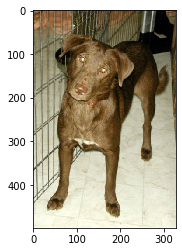

In [43]:
plt.imshow(img)
plt.show()

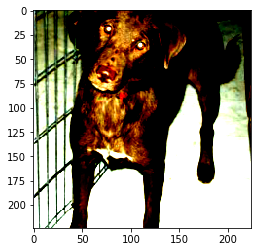

In [49]:
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)  # torch.Size([3, 224, 224])

# (色、高さ、幅)を (高さ、幅、色)に変換し、0-1に値を制限して表示
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [99]:
url = 'drive/My Drive/data/hymenoptera_data'

ILSVRC_class_index = json.load(open(url + '/imagenet_class_index.json', 'r'))
print(ILSVRC_class_index)

{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433', 'junco'], '14': ['n01537544', 'indigo_bunting'], '15': ['n01558993', 'robin'], '16': ['n01560419', 'bulbul'], '17': ['n01580077', 'jay'], '18': ['n01582220', 'magpie'], '19': ['n01592084', 'chickadee'], '20': ['n01601694', 'water_ouzel'], '21': ['n01608432', 'kite'], '22': ['n01614925', 'bald_eagle'], '23': ['n01616318', 'vulture'], '24': ['n01622779', 'great_grey_owl'], '25': ['n01629819', 'European_fire_salamander'], '26': ['n01630670', 'common_newt'], '27': ['n01631663', 'eft'], '28': ['n01632458', 'spotted_salamander'], '29': ['n01632777', 

In [0]:
class ILSVRCPredictor():
  def __init__(self, class_index):
    self.class_index = class_index
   
  def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]

        return predicted_label_name

In [108]:
# ILSVRCのラベル情報をロードし辞意書型変数を生成します
ILSVRC_class_index = json.load(open(url + '/imagenet_class_index.json', 'r'))

# ILSVRCPredictorのインスタンスを生成します
predictor = ILSVRCPredictor(ILSVRC_class_index)

# 入力画像を読み込む
img = Image.open(img_file_path + 'train/dog/dog.1.jpg') # [高さ][幅][色RGB]

# 前処理の後、バッチサイズの次元を追加する
transform = BaseTransform(resize, mean, std)  # 前処理クラス作成
img_transformed = transform(img)  # torch.Size([3, 224, 224])
inputs = img_transformed.unsqueeze_(0)  # torch.Size([1, 3, 224, 224])

# モデルに入力し、モデル出力をラベルに変換する
out = net(inputs)  # torch.Size([1, 1000])
result = predictor.predict_max(out)

# 予測結果を出力する
print("入力画像の予測結果：", result)

入力画像の予測結果： Chesapeake_Bay_retriever
